In [76]:
import numpy as np 
import pandas as pd 


In [77]:
df=pd.read_csv('tested.csv')

In [78]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [79]:
df.shape

(418, 12)

preprocessing

In [80]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [81]:
new_df=df[['Pclass','Sex','Age','Fare','Survived']]
new_df

,Pclass,Sex,Age,Fare,Survived
0,3,male,34.5,7.8292,0
1,3,female,47.0,7.0000,1
2,2,male,62.0,9.6875,0
3,3,male,27.0,8.6625,0
4,3,female,22.0,12.2875,1
...,...,...,...,...,...
413,3,male,NaN,8.0500,0
414,1,female,39.0,108.9000,1
415,3,male,38.5,7.2500,0
416,3,male,NaN,8.0500,0


In [82]:
new_df1=new_df.dropna()
new_df1

,Pclass,Sex,Age,Fare,Survived
0,3,male,34.5,7.8292,0
1,3,female,47.0,7.0000,1
2,2,male,62.0,9.6875,0
3,3,male,27.0,8.6625,0
4,3,female,22.0,12.2875,1
...,...,...,...,...,...
409,3,female,3.0,13.7750,1
411,1,female,37.0,90.0000,1
412,3,female,28.0,7.7750,1
414,1,female,39.0,108.9000,1


In [83]:
# normalizing

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = ['Fare', 'Age', 'Pclass']
new_df1[columns_to_scale] = scaler.fit_transform(new_df1[columns_to_scale])


C:\Users\vasum\AppData\Local\Temp\ipykernel_16880\1039850673.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1[columns_to_scale] = scaler.fit_transform(new_df1[columns_to_scale])


In [84]:
new_df1.head()

,Pclass,Sex,Age,Fare,Survived
0,1.0,male,0.452723,0.015282,0
1,1.0,female,0.617566,0.013663,1
2,0.5,male,0.815377,0.018909,0
3,1.0,male,0.353818,0.016908,0
4,1.0,female,0.287881,0.023984,1


In [85]:
target=new_df1.Survived
target

0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 331, dtype: int64

In [86]:
inputs=new_df1.drop('Survived',axis='columns')
inputs

,Pclass,Sex,Age,Fare
0,1.0,male,0.452723,0.015282
1,1.0,female,0.617566,0.013663
2,0.5,male,0.815377,0.018909
3,1.0,male,0.353818,0.016908
4,1.0,female,0.287881,0.023984
...,...,...,...,...
409,1.0,female,0.037320,0.026887
411,0.0,female,0.485692,0.175668
412,1.0,female,0.367005,0.015176
414,0.0,female,0.512066,0.212559


In [87]:
# encodeding cateregorical data
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()


In [88]:
inputs['Sex_n']= le_sex.fit_transform(inputs['Sex'])
inputs

,Pclass,Sex,Age,Fare,Sex_n
0,1.0,male,0.452723,0.015282,1
1,1.0,female,0.617566,0.013663,0
2,0.5,male,0.815377,0.018909,1
3,1.0,male,0.353818,0.016908,1
4,1.0,female,0.287881,0.023984,0
...,...,...,...,...,...
409,1.0,female,0.037320,0.026887,0
411,0.0,female,0.485692,0.175668,0
412,1.0,female,0.367005,0.015176,0
414,0.0,female,0.512066,0.212559,0


In [89]:
inputs_new=inputs.drop('Sex', axis='columns')
inputs_new

,Pclass,Age,Fare,Sex_n
0,1.0,0.452723,0.015282,1
1,1.0,0.617566,0.013663,0
2,0.5,0.815377,0.018909,1
3,1.0,0.353818,0.016908,1
4,1.0,0.287881,0.023984,0
...,...,...,...,...
409,1.0,0.037320,0.026887,0
411,0.0,0.485692,0.175668,0
412,1.0,0.367005,0.015176,0
414,0.0,0.512066,0.212559,0


In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(inputs_new, target, test_size=0.1, random_state=42)

In [92]:
len(X_train)

297

In [93]:
len(y_test)

34

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
# Decision tree model
from sklearn import tree
model_DecisionTree=tree.DecisionTreeClassifier()
model_DecisionTree.fit(X_train,y_train)
model_DecisionTree.score(X_test,y_test)

1.0

In [96]:
scores_DecisionTree=cross_val_score(tree.DecisionTreeClassifier(),X_train,y_train,cv=10)
scores_DecisionTree

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [97]:
from sklearn.metrics import classification_report

y_pred = model_DecisionTree.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        11

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [98]:
#Gaussian distribution, bell curve


from sklearn.naive_bayes import GaussianNB
model_GaussianNB=GaussianNB()
model_GaussianNB.fit(X_train,y_train)
model_GaussianNB.score(X_test,y_test)

1.0

In [99]:
scores_GaussianNB=cross_val_score(GaussianNB(),X_train,y_train,cv=10)
scores_GaussianNB

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [100]:
from sklearn.metrics import classification_report

y_pred = model_GaussianNB.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        11

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [101]:
from sklearn.svm import SVC
model_svm=SVC()
model_svm.fit(X_train,y_train)
model_svm.score(X_test,y_test)

1.0

In [102]:
scores_svm=cross_val_score(SVC(),X_train,y_train,cv=10)
scores_svm

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [103]:
from sklearn.metrics import classification_report

y_pred = model_svm.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        11

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [104]:
from sklearn.ensemble import RandomForestClassifier
model_RandomForest=RandomForestClassifier(n_estimators=500)
model_RandomForest.fit(X_train,y_train)
model_RandomForest.score(X_test,y_test)

1.0

In [105]:
scores_RandomForest=cross_val_score(RandomForestClassifier(n_estimators=500),X_train,y_train,cv=10)
scores_RandomForest

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [106]:
from sklearn.metrics import classification_report


y_pred = model_RandomForest.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        11

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [107]:
from sklearn.linear_model import LogisticRegression
model_LogisticRegression=LogisticRegression()
model_LogisticRegression.fit(X_train,y_train)
model_LogisticRegression.score(X_test,y_test)

1.0

In [108]:
scores_LogisticRegression=cross_val_score(LogisticRegression(),X_train,y_train,cv=10)
scores_LogisticRegression

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [109]:
from sklearn.metrics import classification_report


y_pred = model_LogisticRegression.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        11

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

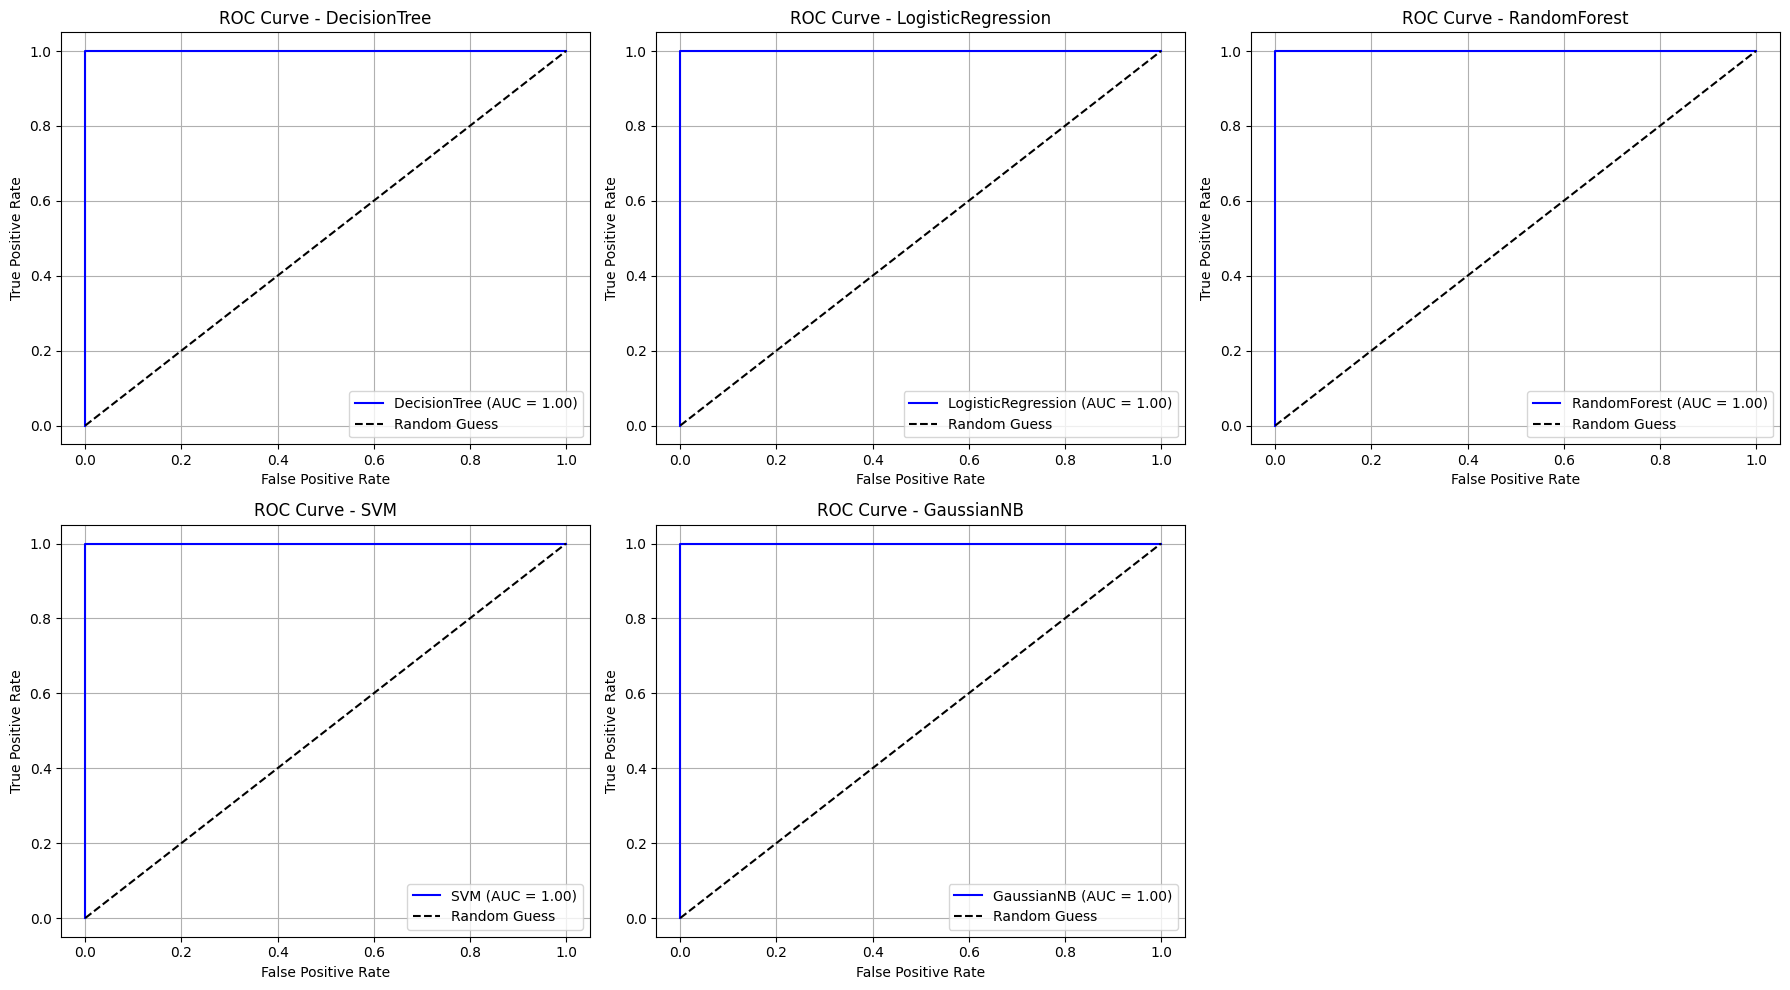

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

models = {
    'DecisionTree': model_DecisionTree,
    'LogisticRegression': model_LogisticRegression,
    'RandomForest': model_RandomForest,
    'SVM': model_svm,
    'GaussianNB': model_GaussianNB
}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  

for ax, (name, model) in zip(axes[:len(models)], models.items()):
    try:
        y_prob = model.predict_proba(X_test)[:, 1] 
    except AttributeError:
        y_prob = model.decision_function(X_test)  
        
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    ax.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})', color='blue')
    ax.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')
    ax.grid(True)

if len(axes) > len(models):
    axes[-1].set_visible(False)

plt.tight_layout()

plt.savefig('roc_curves.png')

NOW I MADE A 5 WELL TRAINED CLASSIFICATION MODEL WITH STRONG SURVIVAL PREDICTION ACCURACY.NOW WE SAVE ALL THE 5 MODELS AND THEN USE WHICHEVER U WANT TO USE

In [112]:
import pickle

models = {
    'DecisionTree': model_DecisionTree,
    'LogisticRegression': model_LogisticRegression,
    'RandomForest': model_RandomForest,
    'SVM': model_svm,
    'GaussianNB': model_GaussianNB
}

# Save each model to a separate .pkl file
for name, model in models.items():
    filename = f'{name}_model.pkl' 
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f'Saved {name} to {filename}')

Saved DecisionTree to DecisionTree_model.pkl
Saved LogisticRegression to LogisticRegression_model.pkl
Saved RandomForest to RandomForest_model.pkl
Saved SVM to SVM_model.pkl
Saved GaussianNB to GaussianNB_model.pkl


THANK YOU